## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
import math

## SingleTrade Backtesting Engine

In [ ]:
def calculate(data9,dd1):

  num_buys=0 #Total no. of buy signals
  num_sells=0 #Total no. of sell signals
  buys=[] #List containing index of each buy trade
  sells=[] #List containing index of each sell trade
  trades=[] #List containing index of all trades

  for i in range(len(data9)):
    if(data9['signals'].iloc[i]==1):
      num_buys=num_buys+1
      buys.append(i)
      trades.append(i)
    elif(data9['signals'].iloc[i]==-1):
      num_sells=num_sells+1
      sells.append(i)
      trades.append(i)
  if(num_buys!=num_sells):
    # changing the signal of the last trade to 0 that is no position.
    data9['signals'].iloc[trades[num_buys+num_sells-1]]=0
    num_closetrades=max(num_buys,num_sells)-1 #Total no. of close trades
    trades.pop()
    if(num_buys>num_sells):
      buys.pop()
    else:
      sells.pop()
  else:
    num_closetrades=num_buys


  balance=1000000 # Initial Capital for Investing.
  capital=1000000 # Capital after each trade


# Risk Management Parameters


  # Risk Management Measures currently in use.

  take_profit=5 # Percentage for trailing take profit
  take_profit2=5 # Percentage for normal take profit
  multiplier=2 # Multiplier for Average True Range Stop Loss
  maxDrawdownLimit=100 # Drawdown Limit to Exit a Trade (drawdown is calculated for entire period)
  percent=5 # Percentage limit of change in (close-low) for long and (high-close) for short trades
  percent2=5 # Percentage limit of daily change in close price


  # Risk Management Measures not in use.

  stop_loss=5 # Percentage for trailing stop loss
  stop_loss2=5 # Percentage for normal stop loss
  multiplier2=2 # Multiplier for Average True Range Take Profit
  maxDrawdownLimit2=100 # Drawdown Limit to Exit a Trade (drawdown is calculated within a trade)
  percent3=100 # Percentage limit of change in low of current day to close of previous day


  no_of_stocks=0
  position=0
  num_stocks=[] #List of no. of stocks hold in each trade
  returns=[] #List containing return from each trade
  capitall=[] #List containing capital after each trade
  remains=[] #List containing not invested capital for each trade
  remainss=[] #List containing not invested capital for each trade
  max__drawdown=[] #List containing Max Drawdown for each trade
  max__dip=[] #List containing Max Dip for each trade
  pv=[]
  j=0
  l=0
  pf=[]
  trades=[]
  rfr1=[]
  buy_signals=[]
  sell_signals=[]
  tsll=[]
  ttpl=[]
  drawdown2=[]
  mx=1000000
  dd2=[]

  data9['TR'] = np.maximum(data9['High'] - data9['Low'],
                            np.maximum(abs(data9['High'] - data9['Close'].shift(1)),
                                       abs(data9['Low'] - data9['Close'].shift(1))))
  data9['ATR'] = data9['TR'].rolling(window=14).mean()

  # Trade wise dataframe
  twd1=pd.DataFrame(columns=['Entry Index','Exit Index','Trade Duration','Entry Price','Exit Price','Returns for Trade in %','Type of Trade','Trade Close By','No. of Stocks Traded','Profit/Loss','Capital'])

  for i in range(len(data9)):
    if(capital>0):

      if(data9['ATR'].iloc[i]>=2.5):
        leverage=3
        multiplier3=1.5
        multiplier3=1.5
      elif(data9['ATR'].iloc[i]>=2 and data9['ATR'].iloc[i]<=2.5):
        leverage=4
        multiplier3=2
        multiplier3=2
      else:
        leverage=5
        multiplie3=2
        multiplier3=2

      if(position==1):
        slp=twd1['Entry Price'].iloc[j]-(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Long Trades usnig ATR
        p2=twd1['Entry Price'].iloc[j]+(multiplier2*data9['ATR'].iloc[i]) # Take Profit price for Long Trades usnig ATR
      elif(position==-1):
        slp=twd1['Entry Price'].iloc[j]+(multiplier*data9['ATR'].iloc[i]) # Stop Loss price for Short Trades using ATR
        p2=twd1['Entry Price'].iloc[j]-(multiplier2*data9['ATR'].iloc[i]) # Take Profit price for Short Trades using ATR


      # Taking a Long position

      if data9['signals'].iloc[i]==1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])*leverage
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          take_profit_p=data9['Close'].iloc[i]+(take_profit2/100)*data9['Close'].iloc[i]
          stop_loss_p=data9['Close'].iloc[i]-(stop_loss2/100)*data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(remain1)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"long",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=1
          trades.append(i)

      # Long position with stop loss or take profit condition

      elif (position==1 and (((abs((data9['Low'].iloc[i]-data9['Close'].iloc[i-1]))/data9['Low'].iloc[i])*100)>=percent3 or (((data9['Close'].iloc[i-1]-data9['Close'].iloc[i])/data9['Close'].iloc[i])*100) >=percent2 or
       (data9['Close'].iloc[i]>=p2) or (((data9['Close'].iloc[i]-data9['Low'].iloc[i])/data9['Close'].iloc[i])*100)>=percent or (max__drawdown3>=maxDrawdownLimit2) or (max__drawdown2>=maxDrawdownLimit) or
        (((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl) or (data9['Close'].iloc[i]<=slp) or (data9['Close'].iloc[i]>=take_profit_p) or (data9['Close'].iloc[i]<=stop_loss_p))):

          if((((data9['Close'].iloc[i]*no_of_stocks)+remain1)<=tsl)):
            twd1['Trade Close By'].iloc[j]="trailing_stop_loss"
          elif(((data9['Close'].iloc[i])>=take_profit_p)):
            twd1['Trade Close By'].iloc[j]="take_profit"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          elif(max__drawdown3>=maxDrawdownLimit2):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit2"
          elif((data9['Close'].iloc[i]<=slp)):
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss1"
          elif((data9['Close'].iloc[i]<=stop_loss_p)):
            twd1['Trade Close By'].iloc[j]="stop_loss2"
          elif(((data9['Close'].iloc[i]-data9['Low'].iloc[i])/data9['Close'].iloc[i])*100) >=percent:
            twd1['Trade Close By'].iloc[j]="ID"
          elif(((data9['Close'].iloc[i-1]-data9['Close'].iloc[i])/data9['Close'].iloc[i])*100) >=percent2:
            twd1['Trade Close By'].iloc[j]="nextday"
          elif(((abs((data9['Low'].iloc[i]-data9['Close'].iloc[i-1]))/data9['Low'].iloc[i])*100)>=percent3):
            twd1['Trade Close By'].iloc[j]="low"
          elif((data9['Close'].iloc[i]>=p2)):
            twd1['Trade Close By'].iloc[j]="ATR_TP"

          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)


      # Taking a Short position

      elif data9['signals'].iloc[i]==-1 and position==0:
          no_of_stocks=int(capital/data9['Close'].iloc[i])*leverage
          num_stocks.append(no_of_stocks)
          price=data9['Close'].iloc[i]
          take_profit_p=data9['Close'].iloc[i]-(take_profit2/100)*data9['Close'].iloc[i]
          stop_loss_p=data9['Close'].iloc[i]+(stop_loss2/100)*data9['Close'].iloc[i]
          remain1=capital-no_of_stocks*price
          remains.append(0)
          #Filling different columns of the DataFrame twd.
          new_row={'Entry Index':i,'Exit Index':0,'Trade Duration':0,'Entry Price':price,'Returns for Trade in %':0,'Type of Trade':"short",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
          twd1.loc[len(twd1)]=new_row
          position=-1
          trades.append(i)

      # Short position with stop loss or take profit condition

      elif (position==-1 and (((abs((data9['High'].iloc[i]-data9['Close'].iloc[i-1]))/data9['High'].iloc[i])*100)>=percent3 or (((data9['Close'].iloc[i]-data9['Close'].iloc[i-1])/data9['Close'].iloc[i])*100) >=percent2 or
       (data9['Close'].iloc[i]<=p2) or (((data9['High'].iloc[i]-data9['Close'].iloc[i])/data9['Close'].iloc[i])*100) >=percent or ((capital+(no_of_stocks*(price-data9['Close'].iloc[i])))>=ttp) or (data9['Close'].iloc[i]>=slp) or
        (max__drawdown3>=maxDrawdownLimit2) or (max__drawdown2>=maxDrawdownLimit) or (data9['Close'].iloc[i]<=take_profit_p) or (data9['Close'].iloc[i]>=stop_loss_p))):
          if(((capital+(no_of_stocks*(price-data9['Close'].iloc[i])))>=ttp)):

            twd1['Trade Close By'].iloc[j]="trailing_take_profit"
          elif(((data9['Close'].iloc[i])<=take_profit_p)):
            twd1['Trade Close By'].iloc[j]="take_profit"
          elif(max__drawdown2>=maxDrawdownLimit):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit"
          elif(max__drawdown3>=maxDrawdownLimit2):
            twd1['Trade Close By'].iloc[j]="Max Drawdown Limit2"
          elif((data9['Close'].iloc[i]>=slp)):
            twd1['Trade Close By'].iloc[j]="ATR_stop_loss2"
          elif((data9['Close'].iloc[i]>=stop_loss_p)):
            twd1['Trade Close By'].iloc[j]="stop_loss2"
          elif(((data9['High'].iloc[i]-data9['Close'].iloc[i])/data9['Close'].iloc[i])*100) >=percent:
            twd1['Trade Close By'].iloc[j]="ID"
          elif(((data9['Close'].iloc[i]-data9['Close'].iloc[i-1])/data9['Close'].iloc[i])*100) >=percent2:
            twd1['Trade Close By'].iloc[j]="nextday"
          elif(((abs((data9['High'].iloc[i]-data9['Close'].iloc[i-1]))/data9['High'].iloc[i])*100)>=percent3):
            twd1['Trade Close By'].iloc[j]="high"
          elif((data9['Close'].iloc[i]<=p2)):
            twd1['Trade Close By'].iloc[j]="ATR_TP"

          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)


      # Long position with sell signal

      elif data9['signals'].iloc[i]==-1 and position==1:
          returns1=(((data9['Close'].iloc[i]-price)/price)*100)
          capital=((data9['Close'].iloc[i]*no_of_stocks)+remain1)
          net=twd1['No. of Stocks Traded'].iloc[j]*((data9['Close'].iloc[i]-twd1['Entry Price'].iloc[j]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=-1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)

      # Short position with buy signal condition

      elif data9['signals'].iloc[i]==1 and position==-1:
          returns1=(((price-data9['Close'].iloc[i])/price)*100)
          capital=capital+((price-data9['Close'].iloc[i])*no_of_stocks)
          net=twd1['No. of Stocks Traded'].iloc[j]*((twd1['Entry Price'].iloc[j]-data9['Close'].iloc[i]))
          twd1['Exit Index'].iloc[j]=i
          twd1['Exit Price'].iloc[j]=data9['Close'].iloc[i]
          twd1['Trade Duration'].iloc[j]=twd1['Exit Index'].iloc[j]-twd1['Entry Index'].iloc[j]
          twd1['Returns for Trade in %'].iloc[j]=returns1
          twd1['Trade Close By'].iloc[j]="signal"
          twd1['Profit/Loss'].iloc[j]=net
          twd1['Capital'].iloc[j]=capital
          data9['signals'].iloc[i]=1
          j=j+1
          position=0
          no_of_stocks=0
          trades.append(i)


      elif(position==1 and data9['signals'].iloc[i]==1):
        data9['signals'].iloc[i]=0
      elif(position==-1 and data9['signals'].iloc[i]==-1):
        data9['signals'].iloc[i]=0

      dd1['No_of_Stocks'].iloc[i]=no_of_stocks
      if(no_of_stocks!=0):
        if(position==1):
          dd1['Portfolio_Value'].iloc[i]=(no_of_stocks*data9['Close'].iloc[i])+remain1
        else:
          dd1['Portfolio_Value'].iloc[i]=capital+(no_of_stocks*(price-data9['Close'].iloc[i]))
      else:
        dd1['Portfolio_Value'].iloc[i]=capital
      dd1['Profit_From_Initial_Capital'].iloc[i]=((dd1['Portfolio_Value'].iloc[i]-balance)/balance)*100
      mx=max(dd1['Portfolio_Value'])

      if (dd1['Portfolio_Value'].iloc[i]>mx):
          mx=dd1['Portfolio_Value'].iloc[i]
      dd2.append(((mx-dd1['Portfolio_Value'].iloc[i])/dd1['Portfolio_Value'].iloc[i])*100)
      max__drawdown2=dd2[i]

      if(position==1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          maxx=max(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown3=(max(drawdown2))
        tsl=(1-(stop_loss/100))*maxx
        tsll.append(tsl)
        pf.clear()
        drawdown2.clear()
      if(position==-1):
        max2=dd1['Portfolio_Value'].iloc[twd1['Entry Index'].iloc[j]]
        for k in range(twd1['Entry Index'].iloc[j],i+1):
          pf.append(dd1['Portfolio_Value'].iloc[k])
          minn=min(pf)
          portfolio2=dd1['Portfolio_Value'].iloc[k]
          if (portfolio2>max2):
            max2=portfolio2
          drawdown2.append(((max2-portfolio2)/portfolio2)*100)
        max__drawdown3=(max(drawdown2))
        ttp=(1+(take_profit/100))*minn
        ttpl.append(ttp)
        pf.clear()
        drawdown2.clear()
      if(position==0 or position==-1):
        tsll.append(dd1['Portfolio_Value'].iloc[i])
      if(position==0 or position==1):
        ttpl.append(dd1['Portfolio_Value'].iloc[i])


  if(twd1['Exit Index'].iloc[len(twd1)-1]==0):
    data9['signals'].iloc[twd1['Entry Index'].iloc[len(twd1)-1]]=0
    twd1=twd1.drop(len(twd1)-1,axis=0)
    trades.pop()
  for i in range(len(data9)):
    if(data9['signals'].iloc[i]==1):
      buy_signals.append(i)
    elif(data9['signals'].iloc[i]==-1):
      sell_signals.append(i)

  #Calculating Maximum Drawdown and Maximum Dip for each Trade.
  dd1['Current Position']=0
  dd1['drawdown']=0
  a=0
  for i in range(0,((int(len(trades)/2)))*2,2):
    drawdown=[]
    index1=trades[i]
    index2=trades[i+1]
    stocks=num_stocks[a]
    remain=remains[a]
    max1=dd1['Portfolio_Value'].iloc[index1]
    min1=dd1['Portfolio_Value'].iloc[index1]
    for j in range(index1,index2+1):
      portfolio=dd1['Portfolio_Value'].iloc[j]
      if (portfolio>max1):
        max1=portfolio
      if (portfolio<min1):
        min1=portfolio
      drawdown.append(((max1-portfolio)/portfolio)*100)
      dd1['drawdown'].iloc[j]=(((max1-portfolio)/portfolio)*100)
      # rfr1.append(data5['Close'].iloc[j])
    max__drawdown.append(max(drawdown))
    max__dip.append(((dd1['Portfolio_Value'].iloc[index1]-min1)/(dd1['Portfolio_Value'].iloc[index1]))*100)
    a=a+1

  twd1['Max Drawdown for Trade']=max__drawdown
  twd1['Max Dip for Trade']=max__dip


  #Code

  #Benchmark Return and Total Returns
  num=int(balance/data9['Close'].iloc[0])
  remain_=balance-num*data9['Close'].iloc[0]
  br=((((num*data9['Close'].iloc[len(data9)-1]))-balance)/balance)*100
  print("Benchmark Return is:",br,"%")

  #Trades
  print("Number of Close Trades are:",int(len(trades)/2))
  wt=0
  lt=0
  total_returns=0
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]>0):
      wt+=1
    elif(twd1['Returns for Trade in %'].iloc[i]<0):
      lt+=1
    total_returns+=twd1['Returns for Trade in %'].iloc[i]
  print("Number of Winning Trades are:",wt)
  print("Number of Losing Trades are:",lt)
  print("Total Returns of Strategy:",(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]),"%")
  #Gross Profit and Net Profit
  gp=(balance*(dd1['Profit_From_Initial_Capital'].iloc[len(dd1)-1]))/100
  print("Gross Profit is:",gp)
  #Max Drawdown
  d=twd1['Max Drawdown for Trade']
  maxDrawdown=max(d)
  print("Maximun Drawdown is:",maxDrawdown,"%")
  #Avg. Drawdown
  avgDrawdown=twd1['Max Drawdown for Trade'].mean()
  print("Average Drawdown is:",avgDrawdown,"%")
  #Max Dip
  maxDip=max(twd1['Max Dip for Trade'])
  print("Maximun Dip is:",maxDip,"%")
  #Avg. Dip
  avgDip=twd1['Max Dip for Trade'].mean()
  print("Average Dip is:",avgDip,"%")
  holding_time=twd1['Trade Duration']
  print("Maximum Holding Time:",max(holding_time))
  print("Average Holding Time:",sum(holding_time)/len(holding_time))

  #Sharpe Ratio and Sortino Ratio
  # print("Calculated Sharpe Ratio of the strategy is:",sharpeRatio1)

  dd1['drawdown2']=dd2

  return twd1,dd1,buy_signals,sell_signals,tsll,ttpl,d

## MultiTrade Backtesting Engine

In [ ]:
def backtest(data_bt):

  balance=1000000
  capital=1000000
  capital_per_trade_percent=30
  capital_per_trade=(capital_per_trade_percent/100)*capital

  buys=[]
  sells=[]
  compounding_capital=[]
  drawdown=[]

  positions=0
  max_positions=5
  j=0

  data_bt['TR'] = np.maximum(data_bt['High'] - data_bt['Low'],
                            np.maximum(abs(data_bt['High'] - data_bt['Close'].shift(1)),
                                       abs(data_bt['Low'] - data_bt['Close'].shift(1))))
  data_bt['ATR'] = data_bt['TR'].rolling(window=14).mean()

  leverage=5

  normal_stop_loss=5
  normal_take_profit=5
  ATR_multiplier=2
  Intraday_price_change_limit=5


  twd1=pd.DataFrame(columns=['Entry Index','Exit Index','Open/Close','Trade Duration','Entry Price','Exit Price','stop loss','take profit','ATR_stop_loss','Returns for Trade in %','Type of Trade','Trade Close By','No. of Stocks Traded','Profit/Loss','Capital'])

  data_bt['TR'] = np.maximum(data_bt['High'] - data_bt['Low'],
                            np.maximum(abs(data_bt['High'] - data_bt['Close'].shift(1)),
                                       abs(data_bt['Low'] - data_bt['Close'].shift(1))))
  data_bt['ATR'] = data_bt['TR'].rolling(window=14).mean()


  for i in range(len(data_bt)):
    if(capital>0):

      if(data_bt['ATR'].iloc[i]>=2.5):
        leverage=3
        multiplier3=1.5
        multiplier3=1.5
      elif(data_bt['ATR'].iloc[i]>=2 and data_bt['ATR'].iloc[i]<=2.5):
        leverage=4
        multiplier3=2
        multiplier3=2
      else:
        leverage=5
        multiplie3=2
        multiplier3=2



      for k in range(0,len(twd1)):
        if(twd1['Open/Close'].iloc[k]==1):

          twd1['ATR_stop_loss'].iloc[k]=twd1['Entry Price'].iloc[k]-(ATR_multiplier*data_bt['ATR'].iloc[i])

          if(data_bt['signals'].iloc[i]==-1 or data_bt['Close'].iloc[i]<=twd1['stop loss'].iloc[k] or data_bt['Close'].iloc[i]>=twd1['take profit'].iloc[k] or data_bt['Close'].iloc[i]<=twd1['ATR_stop_loss'].iloc[k]
             or ((((data_bt['Close'].iloc[i]-data_bt['Low'].iloc[i])/data_bt['Close'].iloc[i])*100) <= Intraday_price_change_limit)):

            capital=capital+(twd1['No. of Stocks Traded'].iloc[k]*(data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k]))
            returns=(((data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k])/twd1['Entry Price'].iloc[k])*100)
            net=twd1['No. of Stocks Traded'].iloc[k]*((data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k]))
            twd1['Exit Index'].iloc[k]=i
            twd1['Exit Price'].iloc[k]=data_bt['Close'].iloc[i]
            twd1['Open/Close'].iloc[k]=0
            twd1['Trade Duration'].iloc[k]=twd1['Exit Index'].iloc[k]-twd1['Entry Index'].iloc[k]
            twd1['Returns for Trade in %'].iloc[k]=returns
            twd1['Profit/Loss'].iloc[k]=net
            twd1['Capital'].iloc[k]=capital
            if(data_bt['signals'].iloc[i]==-1):
              twd1['Trade Close By'].iloc[k]="signal"
            elif(data_bt['Close'].iloc[i]<=twd1['stop loss'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="normal_stop_loss"
            elif(data_bt['Close'].iloc[i]>=twd1['take profit'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="normal_take_profit"
            elif(data_bt['Close'].iloc[i]<=twd1['ATR_stop_loss'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="ATR_stop_loss"
            elif(((((data_bt['Close'].iloc[i]-data_bt['Low'].iloc[i])/data_bt['Close'].iloc[i])*100) <= Intraday_price_change_limit)):
              twd1['Trade Close By'].iloc[k]="Intraday_price_change_limit"

            data_bt['signals'].iloc[i]=0
            sells.append(i)
            positions-=1



        elif(twd1['Open/Close'].iloc[k]==-1):

          twd1['ATR_stop_loss'].iloc[k]=twd1['Entry Price'].iloc[k]+(ATR_multiplier*data_bt['ATR'].iloc[i])

          if(data_bt['signals'].iloc[i]==1 or data_bt['Close'].iloc[i]<=twd1['take profit'].iloc[k] or data_bt['Close'].iloc[i]>=twd1['stop loss'].iloc[k] or data_bt['Close'].iloc[i]>=twd1['ATR_stop_loss'].iloc[k]
             or ((((data_bt['High'].iloc[i]-data_bt['Close'].iloc[i])/data_bt['Close'].iloc[i])*100) >= Intraday_price_change_limit)):



            capital=capital+(twd1['No. of Stocks Traded'].iloc[k]*(twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i]))
            returns=(((twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i])/twd1['Entry Price'].iloc[k])*100)
            net=twd1['No. of Stocks Traded'].iloc[k]*(twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i])
            twd1['Exit Index'].iloc[k]=i
            twd1['Exit Price'].iloc[k]=data_bt['Close'].iloc[i]
            twd1['Open/Close'].iloc[k]=0
            twd1['Trade Duration'].iloc[k]=twd1['Exit Index'].iloc[k]-twd1['Entry Index'].iloc[k]
            twd1['Returns for Trade in %'].iloc[k]=returns
            twd1['Profit/Loss'].iloc[k]=net
            twd1['Capital'].iloc[k]=capital
            if(data_bt['signals'].iloc[i]==1):
              twd1['Trade Close By'].iloc[k]="signal"
            elif(data_bt['Close'].iloc[i]>=twd1['stop loss'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="normal_stop_loss"
            elif(data_bt['Close'].iloc[i]<=twd1['take profit'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="normal_take_profit"
            elif(data_bt['Close'].iloc[i]>=twd1['ATR_stop_loss'].iloc[k]):
              twd1['Trade Close By'].iloc[k]="ATR_stop_loss"
            elif(((((data_bt['High'].iloc[i]-data_bt['Close'].iloc[i])/data_bt['Close'].iloc[i])*100) >= Intraday_price_change_limit)):
              twd1['Trade Close By'].iloc[k]="Intraday_price_change_limit"
            data_bt['signals'].iloc[i]=0
            buys.append(i)
            positions-=1




      if(data_bt['signals'].iloc[i]==1 and positions<=max_positions):

        positions+=1
        price=data_bt['Close'].iloc[i]
        normal_stop_loss_price=(1-(normal_stop_loss/100))*price
        normal_take_profit_price=(1+(normal_take_profit/100))*price
        capital_per_trade=(capital_per_trade_percent/100)*capital
        no_of_stocks=(int(capital_per_trade/data_bt['Close'].iloc[i]))*leverage
        buys.append(i)
        new_row = {'Entry Index':i,'Exit Index':0,'Open/Close':1,'Trade Duration':0,'Entry Price':price,'stop loss':normal_stop_loss_price,'take profit':normal_take_profit_price,'Returns for Trade in %':0,'Type of Trade':"long",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
        twd1.loc[len(twd1)]=new_row




      elif(data_bt['signals'].iloc[i]==-1 and positions<=max_positions):

        positions+=1
        price=data_bt['Close'].iloc[i]
        normal_stop_loss_price=(1+(normal_stop_loss/100))*price
        normal_take_profit_price=(1-(normal_take_profit/100))*price
        capital_per_trade=(capital_per_trade_percent/100)*capital
        no_of_stocks=(int(capital_per_trade/data_bt['Close'].iloc[i]))*leverage
        sells.append(i)
        new_row = {'Entry Index':i,'Exit Index':0,'Open/Close':-1,'Trade Duration':0,'Entry Price':price,'stop loss':normal_stop_loss_price,'take profit':normal_take_profit_price,'Returns for Trade in %':0,'Type of Trade':"short",
                     'Trade Close By':"none", 'Max Drawdown for Trade':0, 'Max Dip for Trade':0, 'No. of Stocks Traded':no_of_stocks,'Profit/Loss':0,'Capital':0}
        twd1.loc[len(twd1)]=new_row




      compounding_capital.append(capital)
      max_capital=max(compounding_capital)
      drawdown.append(((max_capital-capital)/capital)*100)



    else:
      print('No Balance Available')
      break



  for p in range(0,len(twd1)):
    if(twd1['Open/Close'].iloc[p]==1):
            capital=capital+(twd1['No. of Stocks Traded'].iloc[k]*(data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k]))
            returns=(((data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k])/twd1['Entry Price'].iloc[k])*100)
            net=twd1['No. of Stocks Traded'].iloc[k]*((data_bt['Close'].iloc[i]-twd1['Entry Price'].iloc[k]))
            twd1['Exit Index'].iloc[k]=i
            twd1['Exit Price'].iloc[k]=data_bt['Close'].iloc[i]
            twd1['Open/Close'].iloc[k]=0
            twd1['Trade Duration'].iloc[k]=twd1['Exit Index'].iloc[k]-twd1['Entry Index'].iloc[k]
            twd1['Returns for Trade in %'].iloc[k]=returns
            twd1['Profit/Loss'].iloc[k]=net
            twd1['Capital'].iloc[k]=capital
            twd1['Trade Close By'].iloc[k]="end"
            data_bt['signals'].iloc[i]=0
            sells.append(i)
            positions-=1




    elif(twd1['Open/Close'].iloc[p]==-1):
            capital=capital+(twd1['No. of Stocks Traded'].iloc[k]*(twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i]))
            returns=(((twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i])/twd1['Entry Price'].iloc[k])*100)
            net=twd1['No. of Stocks Traded'].iloc[k]*(twd1['Entry Price'].iloc[k]-data_bt['Close'].iloc[i])
            twd1['Exit Index'].iloc[k]=i
            twd1['Exit Price'].iloc[k]=data_bt['Close'].iloc[i]
            twd1['Open/Close'].iloc[k]=0
            twd1['Trade Duration'].iloc[k]=twd1['Exit Index'].iloc[k]-twd1['Entry Index'].iloc[k]
            twd1['Returns for Trade in %'].iloc[k]=returns
            twd1['Profit/Loss'].iloc[k]=net
            twd1['Capital'].iloc[k]=capital
            twd1['Trade Close By'].iloc[k]="end"
            data_bt['signals'].iloc[i]=0
            buys.append(i)
            positions-=1






  #Code

  #Benchmark Return and Total Returns
  num=(int((balance/data_bt['Close'].iloc[0])))
  br=((num*(data_bt['Close'].iloc[len(data_bt)-1]-data_bt['Close'].iloc[0]))/balance)*100
  print("Benchmark Return (without leverage):",br,"%")
  num3=(int(balance/data_bt['Close'].iloc[0]))*leverage
  # num4=(int(num3/100))*100
  br2=((num3*(data_bt['Close'].iloc[len(data_bt)-1]-data_bt['Close'].iloc[0]))/balance)*100
  print("Benchmark Return (with leverage):",br2,"%")

  #Trades
  print("Number of Close Trades are:",int(len(twd1)))
  wt=0
  lt=0
  total_returns=0
  for i in range(len(twd1)):
    if(twd1['Returns for Trade in %'].iloc[i]>0):
      wt+=1
    elif(twd1['Returns for Trade in %'].iloc[i]<0):
      lt+=1
    total_returns+=twd1['Returns for Trade in %'].iloc[i]
  print("Number of Winning Trades are:",wt)
  print("Number of Losing Trades are:",lt)
  print("Total Returns of Strategy:",((twd1['Capital'].iloc[len(twd1)-1]-balance)/balance)*100,"%")

  #Gross Profit and Net Profit
  gp=(twd1['Capital'].iloc[len(twd1)-1])-balance
  print("Gross Profit (in %) is:",(gp/balance)*100,"%")
  print("Gross Profit is:",gp)

  #Max Drawdown
  # d=twd1['Max Drawdown for Trade']
  maxDrawdown=max(drawdown)
  print("Maximum Drawdown is:",maxDrawdown,"%")
  #Avg. Drawdown
  avgDrawdown = np.mean(drawdown)
  print("Average Drawdown is:",avgDrawdown,"%")

  #Trade Duration
  holding_time=twd1['Trade Duration']
  print("Maximum Holding Time:",max(holding_time))
  print("Average Holding Time:",sum(holding_time)/len(holding_time))

  #Sharpe Ratio
  # print("Sharpe Ratio of the strategy is:", sharpe_ratio((returns1)))

  return twd1,buys,sells

# Startegies for different Market Conditions

In [ ]:
def RSI(data):
    window=14
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).ewm(span=window, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(span=window, adjust=False).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi




    return data

In [ ]:
def strategy_0(data):

    window=5
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).ewm(span=window, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(span=window, adjust=False).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI0'] = rsi

    window=5
    num_std=2
    data['Middle0'] = data['Close'].rolling(window=window).mean()
    data['Upper0'] = data['Middle0'] + num_std * data['Close'].rolling(window=window).std()
    data['Lower0'] = data['Middle0'] - num_std * data['Close'].rolling(window=window).std()

    window=7
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    data['%K'] = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    # Calculate the %D line (which is a moving average of %K)
    data['%D'] = data['%K'].rolling(window=12).mean()


    high_1 = data['High'].rolling(window=7).max()
    low_1 = data['Low'].rolling(window=7).min()
    data['CL'] = (high_1 + low_1) / 2

    high_2 = data['High'].rolling(window=10).max()
    low_2 = data['Low'].rolling(window=10).min()
    data['BL'] = (high_2 + low_2) / 2

    data['SA'] = ((data['CL'] + data['BL']) / 2).shift(10)

    high_3 = data['High'].rolling(window=14).max()
    low_3 = data['Low'].rolling(window=14).min()
    data['SB'] = ((high_3 + low_3) / 2).shift(10)


    return data

In [ ]:
def volatile_sideways_market(data, period=20,window=14):

    # Calculate VWAP
    data['TP1'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['VWAP1'] = (data['TP'] * data['Volume']).rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()

    # Calculate Bollinger Bands
    data['Middle_Band'] = data['Close'].rolling(window=period).mean()
    data['Upper_Band'] = data['Middle_Band'] + 2 * data['Close'].rolling(window=period).std()
    data['Lower_Band'] = data['Middle_Band'] - 2 * data['Close'].rolling(window=period).std()

    # Calculate MACD
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate RSI
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    data['RSI1'] = 100 - (100 / (1 + rs))

    # Calculate Stochastic Oscillator
    data['Low14'] = data['Low'].rolling(window=14).min()
    data['High14'] = data['High'].rolling(window=14).max()
    data['Stochastic_K'] = 100 * ((data['Close'] - data['Low14']) / (data['High14'] - data['Low14']))
    data['Stochastic_D'] = data['Stochastic_K'].rolling(window=3).mean()

    # Calculate ATR (Average True Range)
    data['High_Low'] = data['High'] - data['Low']
    data['High_PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low_PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['High_Low', 'High_PC', 'Low_PC']].max(axis=1)
    data['ATR1'] = data['TR'].rolling(window=period).mean()
    data['ATR1'] = data['TR'].rolling(window=window, min_periods=1).mean()
    multiplier = 1.5
    data['stop_loss1_1']=data['Close']-data['ATR1']*multiplier
    data['stop_loss2_1']=data['Close']+data['ATR1']*multiplier
    data['+DI'] = 100 * (data['+DM'].rolling(window=window, min_periods=1).mean() / data['ATR1'])
    data['-DI'] = 100 * (data['-DM'].rolling(window=window, min_periods=1).mean() / data['ATR1'])
    return data

In [ ]:
def vwap_reversion(data,period=20):
    data['TP'] = (data['High']+data['Low']+data['Close'])/ 3

    data['VWAP']=(data['TP']*data['Volume']).rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()
    data['signals'] = 0

    data['dev'] = (data['Close'] - data['VWAP']) / data['VWAP']
    return data

In [ ]:
def strong_bull(data,period=7):

    data['TP'] = (data['High']+data['Low']+data['Close'])/ 3

    data['VWAP']=(data['TP']*data['Volume']).rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()


    data['dev'] = (data['Close'] - data['VWAP']) / data['VWAP']

    threshold=0.02

    data['Bullish_Engulfing'] = (data['Close'].shift(1) > data['Open'].shift(1)) & (data['Close'] < data['Open']) & \
                            (data['Open'] > data['Close'].shift(1)) & (data['Close'] < data['Open'].shift(1))

    window = 20

    data['High_Rolling'] = data['High'].rolling(window=window).max()
    data['Low_Rolling'] = data['Low'].rolling(window=window).min()
    window = 14

    window = 14

    # Step 1: Calculate price changes
    data['Price_Change'] = data['Close'].diff()

    # Step 2: Calculate gains and losses
    data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
    data['Loss'] = np.where(data['Price_Change'] < 0, -data['Price_Change'], 0)

    # Step 3: Calculate the average gain and loss
    data['Avg_Gain'] = data['Gain'].rolling(window=window, min_periods=1).mean()
    data['Avg_Loss'] = data['Loss'].rolling(window=window, min_periods=1).mean()

    # Step 4: Calculate Relative Strength (RS)
    data['RS'] = data['Avg_Gain'] / data['Avg_Loss']

    # Step 5: Calculate RSI
    data['RSI'] = 100 - (100 / (1 + data['RS']))

    # Calculate ADX manually
    # Step 1: Calculate True Range (TR)
    data['High_Low'] = data['High'] - data['Low']
    data['High_PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low_PC'] = abs(data['Low'] - data['Close'].shift(1))

    data['TR'] = data[['High_Low', 'High_PC', 'Low_PC']].max(axis=1)

    # Step 2: Calculate Directional Movement (+DM and -DM)
    data['+DM'] = np.where((data['High'] - data['High'].shift(1)) > (data['Low'].shift(1) - data['Low']),
                          data['High'] - data['High'].shift(1), 0)
    data['+DM'] = np.where(data['+DM'] < 0, 0, data['+DM'])

    data['-DM'] = np.where((data['Low'].shift(1) - data['Low']) > (data['High'] - data['High'].shift(1)),
                          data['Low'].shift(1) - data['Low'], 0)
    data['-DM'] = np.where(data['-DM'] < 0, 0, data['-DM'])

    # Step 3: Calculate Smoothed True Range (ATR), +DI, and -DI
    data['ATR'] = data['TR'].rolling(window=window, min_periods=1).mean()
    multiplier = 2
    data['stop_loss1']=data['Close']-data['ATR']*multiplier
    data['stop_loss2']=data['Close']+data['ATR']*multiplier
    data['+DI'] = 100 * (data['+DM'].rolling(window=window, min_periods=1).mean() / data['ATR'])
    data['-DI'] = 100 * (data['-DM'].rolling(window=window, min_periods=1).mean() / data['ATR'])

    # Step 4: Calculate Directional Movement Index (DX)
    data['DX'] = 100 * abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])

    # Step 5: Calculate ADX
    data['ADX'] = data['DX'].rolling(window=window, min_periods=1).mean()






    return data

In [ ]:
def bearish_volatile_strategy(data, short_window=10, long_window=20, atr_window=7, rsi_window=7, volume_window=10):
    # Calculate short-term and long-term moving averages
    data['Short_MA8'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA8'] = data['Close'].rolling(window=long_window).mean()

    # Calculate ATR for volatility
    data['High_Low'] = data['High'] - data['Low']
    data['High_PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low_PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR8'] = data[['High_Low', 'High_PC', 'Low_PC']].max(axis=1)
    data['ATR8'] = data['TR8'].rolling(window=7).mean()

    # Calculate RSI
    data['Price_Change'] = data['Close'].diff()
    data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
    data['Loss'] = np.where(data['Price_Change'] < 0, -data['Price_Change'], 0)
    data['Avg_Gain'] = data['Gain'].rolling(window=rsi_window, min_periods=1).mean()
    data['Avg_Loss'] = data['Loss'].rolling(window=rsi_window, min_periods=1).mean()
    data['RS8'] = data['Avg_Gain'] / data['Avg_Loss']
    data['RSI8'] = 100 - (100 / (1 + data['RS8']))

    # Calculate Bollinger Bands
    data['Middle_Band8'] = data['Close'].rolling(window=20).mean()
    data['Upper_Band8'] = data['Middle_Band8'] + (2 * data['Close'].rolling(window=20).std())
    data['Lower_Band8'] = data['Middle_Band8'] - (2 * data['Close'].rolling(window=20).std())

    # Calculate Volume Moving Average
    data['Avg_Volume'] = data['Volume'].rolling(window=volume_window).mean()
    data['ATR_mean_roll7']=data['ATR'].rolling(window=7).mean()
    window=7
    data['ATR8'] = data['TR'].rolling(window=window, min_periods=1).mean()
    multiplier = 1.5
    data['stop_loss1_8']=data['Close']-data['ATR8']*multiplier
    data['stop_loss2_8']=data['Close']+data['ATR8']*multiplier
    return data

In [ ]:
def bullish_volatile_strategy(data, short_window=10, long_window=20, atr_window=7, rsi_window=7, volume_window=10):
    # Calculate short-term and long-term moving averages
    data['Short_MA6'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA6'] = data['Close'].rolling(window=long_window).mean()

    # Calculate ATR for volatility
    data['High_Low'] = data['High'] - data['Low']
    data['High_PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low_PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR6'] = data[['High_Low', 'High_PC', 'Low_PC']].max(axis=1)
    data['ATR6'] = data['TR6'].rolling(window=7).mean()

    # Calculate RSI
    data['Price_Change'] = data['Close'].diff()
    data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
    data['Loss'] = np.where(data['Price_Change'] < 0, -data['Price_Change'], 0)
    data['Avg_Gain'] = data['Gain'].rolling(window=rsi_window, min_periods=1).mean()
    data['Avg_Loss'] = data['Loss'].rolling(window=rsi_window, min_periods=1).mean()
    data['RSI6'] = data['Avg_Gain'] / data['Avg_Loss']
    data['RSI6'] = 100 - (100 / (1 + data['RSI6']))

    # Calculate Bollinger Bands
    data['Middle_Band6'] = data['Close'].rolling(window=20).mean()
    data['Upper_Band6'] = data['Middle_Band6'] + (2 * data['Close'].rolling(window=20).std())
    data['Lower_Band6'] = data['Middle_Band6'] - (2 * data['Close'].rolling(window=20).std())

    # Calculate Volume Moving Average
    data['Avg_Volume'] = data['Volume'].rolling(window=volume_window).mean()
    data['ATR_mean_roll7']=data['ATR'].rolling(window=7).mean()
    window=7
    data['ATR6'] = data['TR6'].rolling(window=window, min_periods=1).mean()
    multiplier = 1.5
    data['stop_loss1_6']=data['Close']-data['ATR6']*multiplier
    data['stop_loss2_6']=data['Close']+data['ATR6']*multiplier
    return data

In [ ]:
def strong_bear(data):

    ct1=0
    ct2=0
    data['Bearish_Engulfing'] = (data['Close'].shift(1) < data['Open'].shift(1)) & (data['Close'] > data['Open']) & \
                            (data['Open'] < data['Close'].shift(1)) & (data['Close'] > data['Open'].shift(1))
    window = 20

    data['High_Rolling'] = data['High'].rolling(window=window).max()
    data['Low_Rolling'] = data['Low'].rolling(window=window).min()
    window = 14

    window = 14
    data['dev'] = (data['Close'] - data['VWAP']) / data['VWAP']
    # Step 1: Calculate price changes
    data['Price_Change'] = data['Close'].diff()

    # Step 2: Calculate gains and losses
    data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
    data['Loss'] = np.where(data['Price_Change'] < 0, -data['Price_Change'], 0)

    # Step 3: Calculate the average gain and loss
    data['Avg_Gain'] = data['Gain'].rolling(window=window, min_periods=1).mean()
    data['Avg_Loss'] = data['Loss'].rolling(window=window, min_periods=1).mean()

    # Step 4: Calculate Relative Strength (RS)
    data['RS'] = data['Avg_Gain'] / data['Avg_Loss']

    # Step 5: Calculate RSI
    data['RSI'] = 100 - (100 / (1 + data['RS']))

    # Calculate ADX manually
    # Step 1: Calculate True Range (TR)
    data['High_Low'] = data['High'] - data['Low']
    data['High_PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low_PC'] = abs(data['Low'] - data['Close'].shift(1))

    data['TR'] = data[['High_Low', 'High_PC', 'Low_PC']].max(axis=1)

    # Step 2: Calculate Directional Movement (+DM and -DM)
    data['+DM'] = np.where((data['High'] - data['High'].shift(1)) > (data['Low'].shift(1) - data['Low']),
                          data['High'] - data['High'].shift(1), 0)
    data['+DM'] = np.where(data['+DM'] < 0, 0, data['+DM'])

    data['-DM'] = np.where((data['Low'].shift(1) - data['Low']) > (data['High'] - data['High'].shift(1)),
                          data['Low'].shift(1) - data['Low'], 0)
    data['-DM'] = np.where(data['-DM'] < 0, 0, data['-DM'])

    # Step 3: Calculate Smoothed True Range (ATR), +DI, and -DI
    data['ATR'] = data['TR'].rolling(window=window, min_periods=1).mean()
    data['+DI'] = 100 * (data['+DM'].rolling(window=window, min_periods=1).mean() / data['ATR'])
    data['-DI'] = 100 * (data['-DM'].rolling(window=window, min_periods=1).mean() / data['ATR'])

    # Step 4: Calculate Directional Movement Index (DX)
    data['DX'] = 100 * abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])

    # Step 5: Calculate ADX
    data['ADX'] = data['DX'].rolling(window=window, min_periods=1).mean()
    return data

In [ ]:
def klinger_volume_oscillator(data, short_period=15, long_period=30, signal_period=5):

    # Calculate the Typical Price (TP)
    data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3

    # Calculate Volume Force (VF)
    data['VF'] = np.where(data['TP'] > data['TP'].shift(1), data['Volume'],
                        np.where(data['TP'] < data['TP'].shift(1), -data['Volume'], 0))

    # Calculate Fast EMA (short period) and Slow EMA (long period) of VF
    data['KVO'] = data['VF'].ewm(span=short_period, adjust=False).mean() - data['VF'].ewm(span=long_period, adjust=False).mean()

    # Calculate Signal Line (EMA of KVO)
    data['KVO_signal'] = data['KVO'].ewm(span=signal_period, adjust=False).mean()

    return data

In [ ]:
def sideways_market(data, period=20):


    # Calculate VWAP
    data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['VWAP'] = (data['TP'] * data['Volume']).rolling(window=period).sum() / data['Volume'].rolling(window=period).sum()

    # Calculate Bollinger Bands
    data['Middle_Band'] = data['Close'].rolling(window=period).mean()
    data['Upper_Band'] = data['Middle_Band'] + 2 * data['Close'].rolling(window=period).std()
    data['Lower_Band'] = data['Middle_Band'] - 2 * data['Close'].rolling(window=period).std()

    # Calculate MACD
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()



    # Calculate Stochastic Oscillator
    data['Low14'] = data['Low'].rolling(window=14).min()
    data['High14'] = data['High'].rolling(window=14).max()
    data['Stochastic_K'] = 100 * ((data['Close'] - data['Low14']) / (data['High14'] - data['Low14']))
    data['Stochastic_D'] = data['Stochastic_K'].rolling(window=3).mean()



    return data

In [ ]:
def bollinger_bands(data, period=25, std_dev=2):

    # Calculate the Middle Band (SMA)
    data['Middle Band'] = data['Close'].rolling(window=period).mean()

    # Calculate the Standard Deviation
    data['STD'] = data['Close'].rolling(window=period).std()

    # Calculate the Upper and Lower Bands
    data['Upper Band'] = data['Middle Band'] + (std_dev * data['STD'])
    data['Lower Band'] = data['Middle Band'] - (std_dev * data['STD'])

    return data

In [ ]:
def calculate_atr(data,period_atr):

    data['ATR'] = data['TR'].rolling(window=period_atr).mean()
    return data
def calculate_vpt_adx(data,period=14,period_atr=14,multiplier=3):
    # data['VPT'] = (data['Close'].pct_change() * data['Volume']).cumsum()
  # Calculate True Range (TR)
    data['TR']=0
    data['+DM']=0
    data['-DM']=0
    for i in range(1,len(data)):
      data['TR'].iloc[i] = np.maximum(data['High'].iloc[i] - data['Low'].iloc[i],
                          np.maximum(abs(data['High'].iloc[i] - data['Close'].iloc[i-1]),
                                     abs(data['Low'].iloc[i] - data['Close'].iloc[i-1])))

    # Calculate Directional Movement (+DM, -DM)
      data['+DM'].iloc[i] = np.where((data['High'].iloc[i] - data['High'].iloc[i-1]) > (data['Low'].iloc[i-1] - data['Low'].iloc[i]),
                         np.maximum(data['High'].iloc[i] - data['High'].iloc[i-1], 0), 0)
      data['-DM'].iloc[i] = np.where((data['Low'].iloc[i-1] - data['Low'].iloc[i]) > (data['High'].iloc[i] - data['High'].iloc[i-1]),
                         np.maximum(data['Low'].iloc[i-1] - data['Low'].iloc[i], 0), 0)

    # Calculate the smoothed TR, +DM, and -DM
    data['TR_smooth'] = data['TR'].rolling(window=period).sum()
    data['+DM_smooth'] = data['+DM'].rolling(window=period).sum()
    data['-DM_smooth'] = data['-DM'].rolling(window=period).sum()

    # Calculate Directional Indicators (+DI, -DI)
    data['+DI'] = 100 * (data['+DM_smooth'] / data['TR_smooth'])
    data['-DI'] = 100 * (data['-DM_smooth'] / data['TR_smooth'])

    # Calculate the Directional Index (DX)
    data['DX'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI']))

    # Calculate the Average Directional Index (ADX)
    data['ADX'] = data['DX'].rolling(window=period).mean()
    #  Calculate ATR
    data = calculate_atr(data,period_atr)

    # Calculate Basic UpperBand and LowerBand
    data['BasicUpperBand'] = ((data['High'] + data['Low']) / 2) + (multiplier * data['ATR'])
    data['BasicLowerBand'] = ((data['High'] + data['Low']) / 2) - (multiplier * data['ATR'])

    # Initialize Supertrend columns
    data['FinalUpperBand'] = data['BasicUpperBand']
    data['FinalLowerBand'] = data['BasicLowerBand']
    data['Supertrend'] = 0

    # Iterate through the data to calculate FinalUpperBand, FinalLowerBand, and Supertrend
    for i in range(1, len(data)):
        # Calculate Final Upper Band
        if data['Close'][i-1] <= data['FinalUpperBand'][i-1]:
            data['FinalUpperBand'][i] = min(data['BasicUpperBand'][i], data['FinalUpperBand'][i-1])
        else:
            data['FinalUpperBand'][i] = data['BasicUpperBand'][i]

        # Calculate Final Lower Band
        if data['Close'][i-1] >= data['FinalLowerBand'][i-1]:
            data['FinalLowerBand'][i] = max(data['BasicLowerBand'][i], data['FinalLowerBand'][i-1])
        else:
            data['FinalLowerBand'][i] = data['BasicLowerBand'][i]

        # Determine Supertrend
        if data['Close'][i] > data['FinalUpperBand'][i-1]:
            data['Supertrend'][i] = data['FinalLowerBand'][i]
        elif data['Close'][i] < data['FinalLowerBand'][i-1]:
            data['Supertrend'][i] = data['FinalUpperBand'][i]
        else:
            data['Supertrend'][i] = data['Supertrend'][i-1]
    return data

# Clusters (Centroids)

In [ ]:
centroid=[[ 7.02832545e-01, -2.91184426e-01, -6.77851838e-02,
        -2.52727817e-01,  1.03531545e-01,  7.48986017e-01,
        -7.98210226e-02, -2.25205404e-02, -2.57721260e-01,
        -8.19004586e-02],
       [-6.19068587e-01,  9.54239907e-02, -1.64406504e-01,
        -1.04236507e-04, -5.82956895e-01, -6.49650188e-01,
        -9.25443280e-02, -3.86468988e-02,  8.35242466e-02,
        -8.68858190e-02],
       [ 8.26728965e-01,  8.70723422e-01,  2.07680136e-01,
         3.27732272e+00,  7.79326393e+00,  2.52418385e-01,
         1.74442529e+01,  1.70630584e+01, -1.69414818e-01,
         1.74550379e+01],
       [-5.05895353e-01, -1.18133099e+00, -1.77694617e-01,
        -7.02269845e-01, -3.22901827e-01, -5.23130692e-01,
        -6.60047229e-02, -5.19019543e-02, -1.15100982e+00,
        -6.22381904e-02],
       [-2.67834942e-01,  1.15740153e+00, -3.30835940e-02,
         7.29829243e-01,  5.42411568e-02, -2.04424051e-01,
        -2.20182737e-02, -7.72101033e-02,  1.24031121e+00,
        -2.58187521e-02],
       [ 1.35219396e+00,  1.13331097e+00, -7.79927939e-04,
         1.50268730e+00,  1.47536614e+00,  1.60037393e+00,
         1.63767592e-02, -8.43991121e-02,  8.36870238e-01,
        -4.28668864e-03],
       [ 2.78851340e+00, -1.39412476e+00, -1.94063536e-01,
        -2.01762605e+00,  1.85380491e+00,  2.32076060e+00,
         4.46485093e-02, -1.41200324e-01, -1.39252849e+00,
         6.61480289e-02],
       [-4.68228092e-01, -3.91482628e-01,  1.46590699e+01,
        -3.70188259e-02, -7.47190527e-01, -4.11500845e-01,
        -2.08038404e-02, -1.18396154e-01, -6.00118668e-02,
        -2.63797356e-02],
       [-8.45405718e-02, -2.67203818e-02,  3.37324209e+00,
        -2.13492639e-02, -5.43459723e-02, -1.66873548e-01,
        -1.30826014e-02, -5.81894934e-02,  2.25635890e-02,
        -2.76535479e-02],
       [ 3.00273363e-01,  5.68983028e+00,  4.59569637e-01,
         1.32832692e+01,  1.34454242e+01, -3.00369050e+00,
         1.94135604e+00, -6.66191967e-01,  2.31138670e+00,
         1.22004558e+00]]
scales=np.array([1.04410510e-02, 7.31091284e+00, 1.01603081e+00, 2.24345787e-01,
       2.02216081e-01, 1.10249946e-02, 1.81772479e+01, 1.03444870e+01,
       1.30517854e-01, 2.75454396e+01])
means=np.array([2.83472272e-02, 4.41164325e+01, 1.04715800e+00, 4.23024308e-02,
       3.03466913e-01, 3.31156714e-02, 1.37114899e+01, 6.89141414e+00,
       5.36695636e-01, 2.03933081e+01])

# Function

In [ ]:
def calculate_indicators(df):
  df=RSI(df)
  df=vwap_reversion(df)
  df=strong_bull(df)
  df=bearish_volatile_strategy(df)
  df=volatile_sideways_market(df)
  df=klinger_volume_oscillator(df)
  df=strong_bear(df)
  df=sideways_market(df)
  df=strategy_0(df)
  df=calculate_vpt_adx(df)
  df=bollinger_bands(df)

  df=bullish_volatile_strategy(df)
  return df

In [ ]:
def scale(df):
  return (df-means)/scales
def unscale(df):
  return df*scales+means

In [ ]:
def splitter(df):
    list1 = []
    n = df.shape[0]
    m = 63
    for i in range(0, n, m):
        df1 = df.iloc[i:min(i+m, n)]
        list1.append(df1)
    return list1

In [ ]:
class Clustering:
    def __init__(self, df):
        self.df = df.copy()

    def atr(self, n):
        self.df['H-L']=abs(self.df['High']-self.df['Low'])
        self.df['H-PC']=abs(self.df['High']-self.df['Close'].shift(1))
        self.df['L-PC']=abs(self.df['Low']-self.df['Close'].shift(1))
        self.df['TR']=self.df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
        self.df['ATR']=self.df['TR'].rolling(n).mean()
        self.df['ATR']=self.df['ATR'].shift(1)
        self.df.drop(['H-L','H-PC','L-PC'],axis=1,inplace=True)
        return self.df

    def par1(self):
        self.atr(10)
        self.df['par1']=self.df['ATR']/self.df['Close']
        self.df['par1'].fillna(0,inplace=True)
        sum=0
        for i in range(len(self.df)):
            sum+=self.df['par1'].iloc[i]
        return sum/len(self.df)

    def rsi(self, n):
        self.df['delta']=self.df['Close']-self.df['Close'].shift(1)
        self.df['gain']=np.where(self.df['delta']>=0,self.df['delta'],0)
        self.df['loss']=np.where(self.df['delta']<0,-1*self.df['delta'],0)
        self.df['avg_gain']=self.df['gain'].rolling(n).mean()
        self.df['avg_loss']=self.df['loss'].rolling(n).mean()
        self.df['rs']=self.df['avg_gain']/self.df['avg_loss']
        self.df['rsi']=100-(100/(1+self.df['rs']))
        self.df.drop(['gain','loss','avg_gain','avg_loss','rs'],axis=1,inplace=True)
        return self.df

    def par2(self):
        self.rsi(10)
        self.df['rsi'].fillna(0,inplace=True)
        sum=0
        for i in range(len(self.df)):
            sum+=self.df['rsi'].iloc[i]
        return sum/len(self.df)

    def par3(self):
        self.df['volume_change']=(self.df['Volume']-self.df['Volume'].shift(1))/self.df['Volume']
        self.df['volume_change'].fillna(0,inplace=True)
        sum=0
        for i in range(len(self.df)):
            sum+=self.df['volume_change'].iloc[i]*self.df['volume_change'].iloc[i]
        return np.sqrt(sum/len(self.df))

    def par4(self):
        avg_close=self.df['Close'].mean()
        total_change=self.df['Close'].iloc[-1]-self.df['Close'].iloc[0]
        return total_change/avg_close

    def par5(self):
        max_high=self.df['High'].max()
        min_low=self.df['Low'].min()
        mean_close=self.df['Close'].mean()
        return (max_high-min_low)/mean_close

    def par6(self):
        self.df['Average']=(self.df['High']-self.df['Low'])/self.df['Close']
        return self.df['Average'].mean()

    def par7(self,window=10,num_std=1.5):
        self.df['Middle']=self.df['Close'].rolling(window=window).mean()
        self.df['Upper']=self.df['Middle']+num_std*self.df['Close'].rolling(window=window).std()
        self.df['Lower']=self.df['Middle']-num_std*self.df['Close'].rolling(window=window).std()
        count_upper=0
        count_lower=0
        for i in range(len(self.df)):
            if self.df['Close'].iloc[i]>self.df['Upper'].iloc[i]:
                count_upper+=1
            elif self.df['Close'].iloc[i]<self.df['Lower'].iloc[i]:
                count_lower+=1
        return count_upper+count_lower

    def par8(self,order):
        close_data=self.df['Close']
        tops=[]
        bottoms=[]
        for i in range(order+1,len(close_data)-order,1):
            top_pivot=1
            for j in range(i-order,i+order+1,1):
                if close_data.iloc[i]<close_data.iloc[j]:
                    top_pivot=0
                    break
            if top_pivot==1:
                tops.append(i)
        for i in range(order+1,len(close_data)-order,1):
            bottom_pivot=1
            for j in range(i-order,i+order+1,1):
                if close_data.iloc[i]>close_data.iloc[j]:
                    bottom_pivot=0
                    break
            if bottom_pivot==1:
                bottoms.append(i)
        num_tops=len(tops)
        num_bottoms=len(bottoms)
        return num_tops+num_bottoms

    def par9(self):
        window=20
        weighting_factor=2/21
        ema=np.zeros(len(self.df))
        sma=np.mean(self.df['Close'][:window])

        try:
          ema[window-1]=sma
        except:
          pass
        for i in range(window,len(self.df)):
            ema[i]=(self.df['Close'].iloc[i]*weighting_factor)+(ema[i-1]*(1-weighting_factor))
        delta_y=np.diff(ema)
        delta_x=np.diff(np.arange(len(ema)))
        slopes=delta_y/delta_x
        for i in range(len(slopes)):
            slopes[i]=1/(1+np.exp(-slopes[i]))
        return np.sum(slopes)/len(slopes)

    def par10(self):
        self.df['New_High']=self.df['Close']==self.df['Close'].rolling(window=10).max()
        self.df['New_Low']=self.df['Close']==self.df['Close'].rolling(window=10).min()
        return self.df['New_High'].sum()+self.df['New_Low'].sum()

    def row(self,name):
        return np.array([self.par1(),self.par2(),self.par3(),self.par4(),self.par5(),self.par6(),self.par7(),self.par8(5),self.par9(),self.par10()])

In [ ]:
def mapper(row):


  temp=row
  distance=np.zeros(len(centroid))
  for i in range(len(centroid)):
    distance[i]=np.linalg.norm(row-centroid[i])



  return (np.argmin(distance))

# Strategy

In [ ]:
def cluster_0(data):
  data['signals'] = 0

  for i in range(1,len(data)):

    percent=1
    multiplier=1

    data['signal1'] = 0
    data['signal1'] = np.where(
        (data['Close'] > data['SA']) &
        (data['Close'] > data['SB']) &
        (data['CL'] > data['BL']) , 1, data['signal1'])
    data['signal1'] = np.where(
        (data['Close'] < data['SA']) &
        (data['Close'] < data['SB']) &
        (data['CL'] < data['BL']) , -1, data['signal1'])

    if((data['signal1'].iloc[i]==1) or (data['RSI0'].iloc[i]<=30)
    or (data['Close'].iloc[i]<data['Lower0'].iloc[i]) or ((data['%K'].iloc[i] < 20) and (data['%D'].iloc[i] < 20) and (data['%K'].iloc[i] > data['%D'].iloc[i]))
    or ((((data['High'].iloc[i]-data['Close'].iloc[i])/data['Close'].iloc[i])*100)>=percent)):

      data['signals'].iloc[i]=1

    elif( (data['signal1'].iloc[i]==1 ) or (data['RSI0'].iloc[i]>=70)
    or (data['Close'].iloc[i]>data['Upper0'].iloc[i]) or (data['%K'].iloc[i] > 80) and ((data['%D'].iloc[i] > 80) and (data['%K'].iloc[i] < data['%D'].iloc[i]))
    or ((((data['Close'].iloc[i]-data['Low'].iloc[i])/data['Close'].iloc[i])*100)>=percent)):

      data['signals'].iloc[i]=-1






    threshold=0.0
    for i in range(len(data)):
     ct1=0 #sell
     ct2=0 #buy
     if data['dev'].iloc[i]< -threshold :
        ct1+=1
     elif data['dev'].iloc[i]>threshold:
        ct2+=1
     if data['Bullish_Engulfing'].iloc[i]==True:
        ct2+=1
     elif data['Bullish_Engulfing'].iloc[i]==False:
        ct1+=1
     if(data['Low'].iloc[i] < data['Low_Rolling'].iloc[i-1]) and (data['Low'].iloc[i-1] >= data['Low_Rolling'].iloc[i]):
        ct1+=1
     elif (data['High'].iloc[i] > data['High_Rolling'].iloc[i-1]) and (data['High'].iloc[i-1] <= data['High_Rolling'].iloc[i-1]):
        ct2+=1
     if(data['RSI0'].iloc[i]<30) and data['ADX'].iloc[i]>25 and data['-DI'].iloc[i]>data['+DI'].iloc[i]:
        ct1+=1
     elif(data['RSI0'].iloc[i]>70) and data['ADX'].iloc[i]>25 and data['+DI'].iloc[i]>data['-DI'].iloc[i]:
        ct2+=1

     if ct1>ct2 :
        data['signals'].iloc[i]=-1
     elif ct2>ct1 :
        data['signals'].iloc[i]=1
     else:
        data['signals'].iloc[i]=0
  return data
def cluster_1(data,period=22):
      data['signals'] = 0
      for i in range(len(data)):
        ct1 = 0  # sell
        ct2 = 0  # buy

        # VWAP deviation
        if data['Close'].iloc[i] < data['VWAP1'].iloc[i]:
            ct1 += 1
        elif data['Close'].iloc[i] > data['VWAP1'].iloc[i]:
            ct2 += 1



        # MACD crossover
        if data['MACD'].iloc[i] < data['Signal_Line'].iloc[i]:
            ct1 += 1
        elif data['MACD'].iloc[i] > data['Signal_Line'].iloc[i]:
            ct2 += 1

        # RSI level check
        if data['RSI1'].iloc[i] < 20:
            ct2 += 1
        elif data['RSI1'].iloc[i] > 80:
            ct1 += 1


        if data['ATR1'].iloc[i] > data['ATR1'].rolling(window=period).mean().iloc[i]:
            # If volatility is high, confirm signals
            if ct1 > ct2:
                data['signals'].iloc[i] = -1
            elif ct2 > ct1:
                data['signals'].iloc[i] = 1
            else:
                data['signals'].iloc[i] = 0
        else:
            # In lower volatility, be more cautious
            if ct1 >= 2:
                data['signals'].iloc[i] = 1
            elif(data['Close'].iloc[i]>data['stop_loss1_1'].iloc[i]):
                data['signals'].iloc[i]=1
            elif ct2 >= 2:
                data['signals'].iloc[i] =-1
            elif(data['Close'].iloc[i]<data['stop_loss2_1'].iloc[i]):
                data['signals'].iloc[i]=-1
            else:
                data['signals'].iloc[i] = 0
      return data
def cluster_2(data,atr_window=7):
        data['signals'] = 0


        ct1 = 0  # sell
        ct2 = 0  # buy

        # VWAP deviation
        if data['Close'].iloc[i] < data['VWAP'].iloc[i]:
            ct1 += 1
        elif data['Close'].iloc[i] > data['VWAP'].iloc[i]:
            ct2 += 1

        # Bollinger Bands breakout
        if data['Close'].iloc[i] < data['Lower_Band'].iloc[i]:
            ct1 += 1
        elif data['Close'].iloc[i] > data['Upper_Band'].iloc[i]:
            ct2 += 1

        # MACD crossover
        if data['MACD'].iloc[i] < data['Signal_Line'].iloc[i]:
            ct1 += 1
        elif data['MACD'].iloc[i] > data['Signal_Line'].iloc[i]:
            ct2 += 1

        # RSI level check
        if data['RSI'].iloc[i] < 30:
            ct2 += 1
        elif data['RSI'].iloc[i] > 70:
            ct1 += 1

        # Stochastic oscillator
        if data['Stochastic_K'].iloc[i] < 20 and data['Stochastic_D'].iloc[i] < 20:
            ct2 += 1
        elif data['Stochastic_K'].iloc[i] > 80 and data['Stochastic_D'].iloc[i] > 80:
            ct1 += 1

        # Generate signals
        if ct1 > ct2 and ct1 >= 3:
            data['signals'].iloc[i] = -1
        elif ct2 > ct1 and ct2 >= 3:
            data['signals'].iloc[i] = 1
        else:
            data['signals'].iloc[i] = 0
        return data
def cluster_3(data, period=20):
    data['signals'] = 0
    threshold=0.03


    for i in range(len(data)):
        ct1 = 0  # sell
        ct2 = 0  # buy

        # VWAP deviation
        if data['Close'].iloc[i] < data['VWAP'].iloc[i]:
            ct1 += 1
        elif data['Close'].iloc[i] > data['VWAP'].iloc[i]:
            ct2 += 1



        # MACD crossover
        if data['MACD'].iloc[i] < data['Signal_Line'].iloc[i]:
            ct1 += 1
        elif data['MACD'].iloc[i] > data['Signal_Line'].iloc[i]:
            ct2 += 1

        # RSI level check
        if data['RSI'].iloc[i] < 30:
            ct2 += 1
        elif data['RSI'].iloc[i] > 70:
            ct1 += 1

        # Stochastic Oscillator
        if data['Stochastic_K'].iloc[i] < 20 and data['Stochastic_D'].iloc[i] < 20:
            ct2 += 1
        elif data['Stochastic_K'].iloc[i] > 80 and data['Stochastic_D'].iloc[i] > 80:
            ct1 += 1

        # Adjust for high volatility
        if data['ATR'].iloc[i] > data['ATR'].rolling(window=period).mean().iloc[i]:
            # If volatility is high, confirm signals
            if ct1 > ct2 :
                data['Signal'].iloc[i] = -1
            elif ct2 > ct1:
                data['Signal'].iloc[i] = 1
            else:
                data['Signal'].iloc[i] = 0
        else:
            # In lower volatility, be more cautious
            if ct1 >= 2:
                data['signals'].iloc[i] = -1
            elif ct2 >= 2:
                data['signals'].iloc[i] = 1
            else:
                data['signals'].iloc[i] = 0

        return data
def cluster_4(data):
    data['signals'] = 0
    adx_threshold=25
    lower_threshold=30
    upper_threshold=70
    for i in range(2,len(data)):
      if(data['Close'].iloc[i] > data['Supertrend'].iloc[i]  and  data['RSI'].iloc[i] < lower_threshold) :
        data['signals'].iloc[i]=1
      elif(data['Close'].iloc[i] > data['Supertrend'].iloc[i] and data['RSI'].iloc[i] > upper_threshold):
        data['signals'].iloc[i]=-1
    return data
def cluster_5(data):
    threshold=0.03
    data['signals'] = 0

    for i in range(len(data)):
      ct1=0 #sell
      ct2=0 #buy
      if data['dev'].iloc[i]< -threshold :
        ct1+=1
      elif data['dev'].iloc[i]>threshold:
        ct2+=1
      if data['Bearish_Engulfing'].iloc[i]==True:
        ct1+=1
      elif data['Bearish_Engulfing'].iloc[i]==False:
        ct2+=1
      if (data['Low'].iloc[i] < data['Low_Rolling'].iloc[i]) and (data['Low'].iloc[i-1] >= data['Low_Rolling'].iloc[i-1]):
        ct1+=1
      elif (data['High'].iloc[i] > data['High_Rolling'].iloc[i-1]) and (data['High'].iloc[i-1] <= data['High_Rolling'].iloc[i-1]):
        ct2+=1
      if(data['RSI'].iloc[i]<30) and data['ADX'].iloc[i]>25 and data['-DI'].iloc[i]>data['+DI'].iloc[i]:
        ct1+=1
      elif(data['RSI'].iloc[i]>70) and data['ADX'].iloc[i]>25 and data['+DI'].iloc[i]>data['-DI'].iloc[i]:
        ct2+=1

      if ct1>ct2 and ct1>=3:
        data['signals'].iloc[i]=-1
      elif ct2>ct1 and ct2>=3:
        data['signals'].iloc[i]=1
      else:
        data['signals'].iloc[i]=0
    return data

def cluster_6(data,atr_window=4):
    data['signals'] = 0
  # Generate sell signals
    for i in range(len(data)):
        bearish_condition = (
            (data['Short_MA6'].iloc[i] < data['Long_MA6'].iloc[i]) or
            (data['RSI6'].iloc[i] > 30) or
            (data['Close'].iloc[i] < data['Lower_Band6'].iloc[i]) or
            (data['ATR6'].iloc[i] > data['ATR'].rolling(window=atr_window ).mean().iloc[i]) or
            (data['Volume'].iloc[i] > data['Avg_Volume'].iloc[i])
        )

        bullish_condition = (
            (data['Short_MA6'].iloc[i] > data['Long_MA6'].iloc[i]) or
            (data['RSI6'].iloc[i] < 70) or
            (data['Close'].iloc[i] > data['Upper_Band6'].iloc[i]) or
            (data['ATR6'].iloc[i] > data['ATR6'].rolling(window=atr_window).mean().iloc[i]) or
            (data['Volume'].iloc[i] > data['Avg_Volume'].iloc[i])
        )

        if bearish_condition:
            data['signals'].iloc[i] = -1  # Sell Signal
        elif bullish_condition:
            data['signals'].iloc[i] = 1  # Buy Signal
    return data
def cluster_7(data):
    data['signals'] = 0
    threshold=0.02
    data.loc[data['dev'] < -threshold, 'signals'] = 1
    data.loc[data['dev'] > threshold, 'signals'] = -1
    return data


def cluster_8(data):
    data['signals'] = 0
    for i in range(len(data)):
        atr_window=5
        bearish_condition = (
            (data['Short_MA8'].iloc[i] < data['Long_MA8'].iloc[i]) or
            (data['RSI8'].iloc[i] > 30) or
            (data['Close'].iloc[i] < data['Lower_Band8'].iloc[i]) or
            (data['ATR8'].iloc[i] > data['ATR8'].rolling(window=atr_window).mean().iloc[i]) or
            (data['Volume'].iloc[i] > data['Avg_Volume'].iloc[i])
        )

        bullish_condition = (
            (data['Short_MA8'].iloc[i] > data['Long_MA8'].iloc[i]) or
            (data['RSI8'].iloc[i] < 70) or
            (data['Close'].iloc[i] > data['Upper_Band8'].iloc[i]) or
            (data['ATR8'].iloc[i] > data['ATR'].rolling(window=atr_window).mean().iloc[i]) or
            (data['Volume'].iloc[i] > data['Avg_Volume'].iloc[i])
        )

        if bearish_condition:
            data['signals'].iloc[i] = -1
        elif(data['Close'].iloc[i]>data['stop_loss1_8'].iloc[i]):
            data['signals'].iloc[i]=-1
        elif(data['Close'].iloc[i]<data['stop_loss2_8'].iloc[i]):
            data['signals'].iloc[i]=1
        elif bullish_condition:
            data['signals'].iloc[i] = 1
    return data
def cluster_9(data):
  data['signals']=0
  threshold=0.02
  data.loc[data['dev'] < threshold, 'signals'] = 1
  data.loc[data['dev'] > threshold, 'signals'] = -1
  return data


# Start

[*********************100%***********************]  1 of 1 completed


Single Trade
Benchmark Return is: 420.86741516113284 %
Number of Close Trades are: 350
Number of Winning Trades are: 159
Number of Losing Trades are: 191
Total Returns of Strategy: 6664.33760013733 %
Gross Profit is: 66643376.0013733
Maximun Drawdown is: 48.74039747412949 %
Average Drawdown is: 5.989599968920868 %
Maximun Dip is: 32.76876914532041 %
Average Dip is: 3.757125638337083 %
Maximum Holding Time: 16
Average Holding Time: 3.8285714285714287


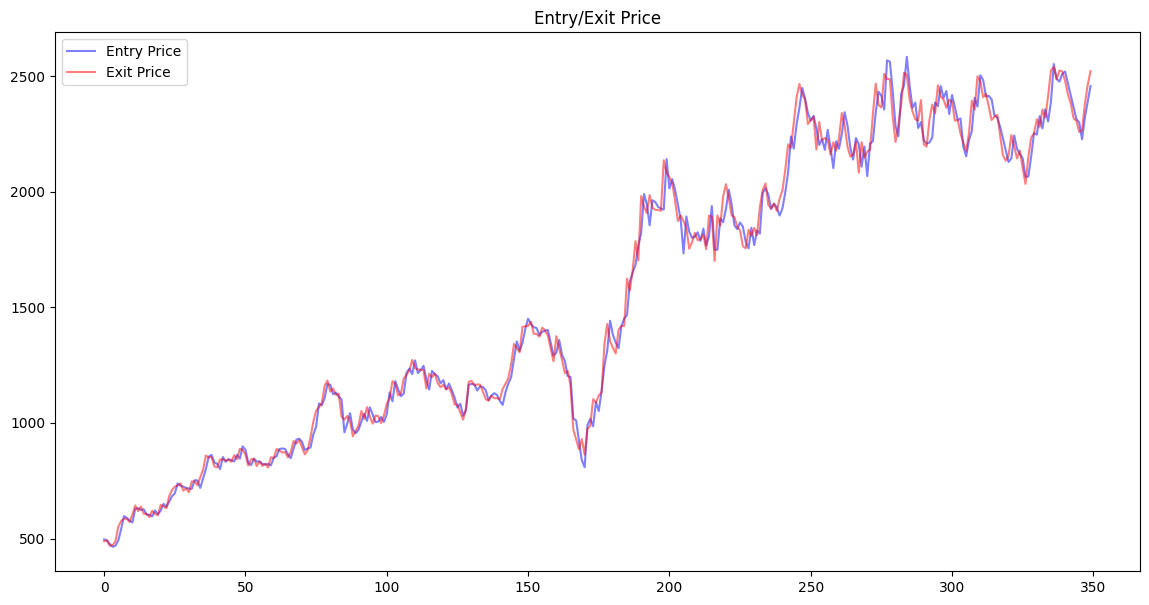

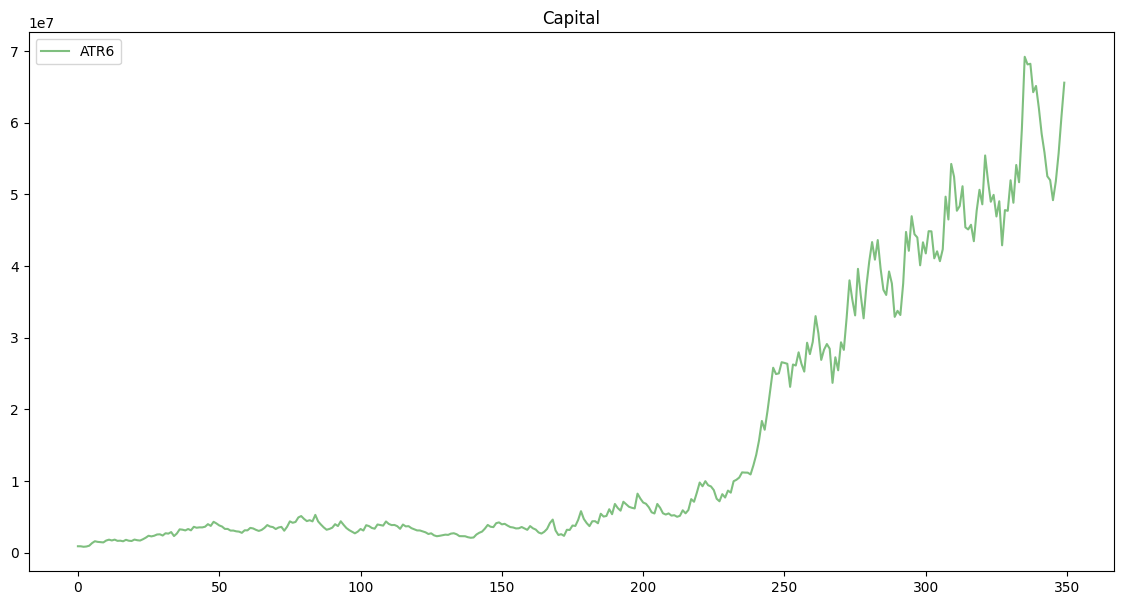

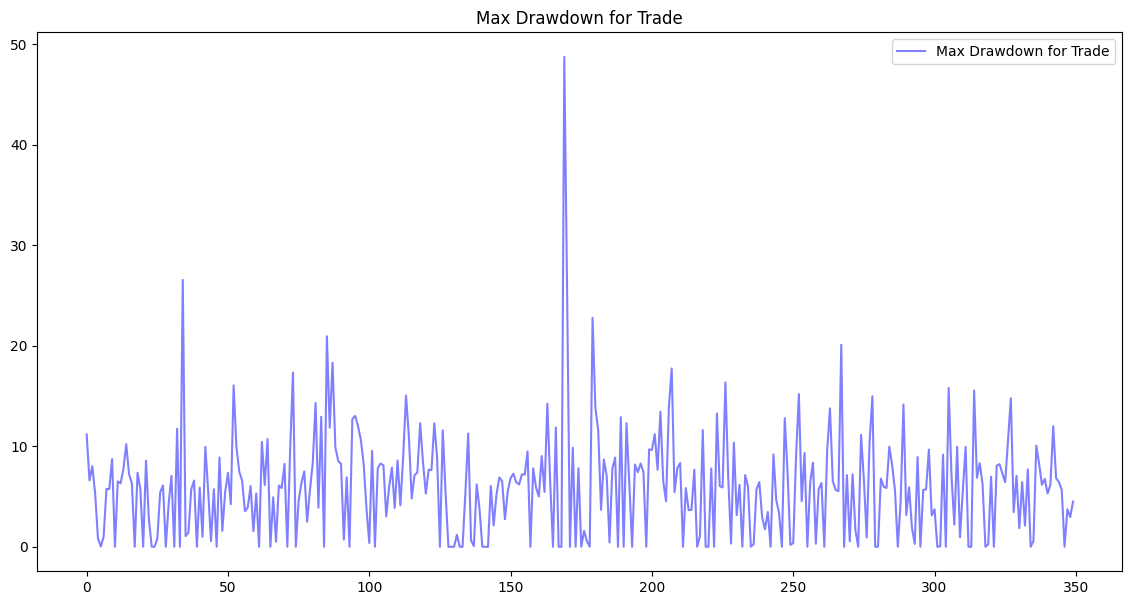

 
 
 
 
Multi Trade
Benchmark Return (without leverage): 420.9090627136231 %
Benchmark Return (with leverage): 1262.7271881408692 %
Number of Close Trades are: 355
Number of Winning Trades are: 179
Number of Losing Trades are: 176
Total Returns of Strategy: 4.359087072753906 %
Gross Profit (in %) is: 4.359087072753906 %
Gross Profit is: 43590.87072753906
Maximum Drawdown is: 63.07058295979806 %
Average Drawdown is: 23.926281527706745 %
Maximum Holding Time: 12
Average Holding Time: 2.0507042253521126


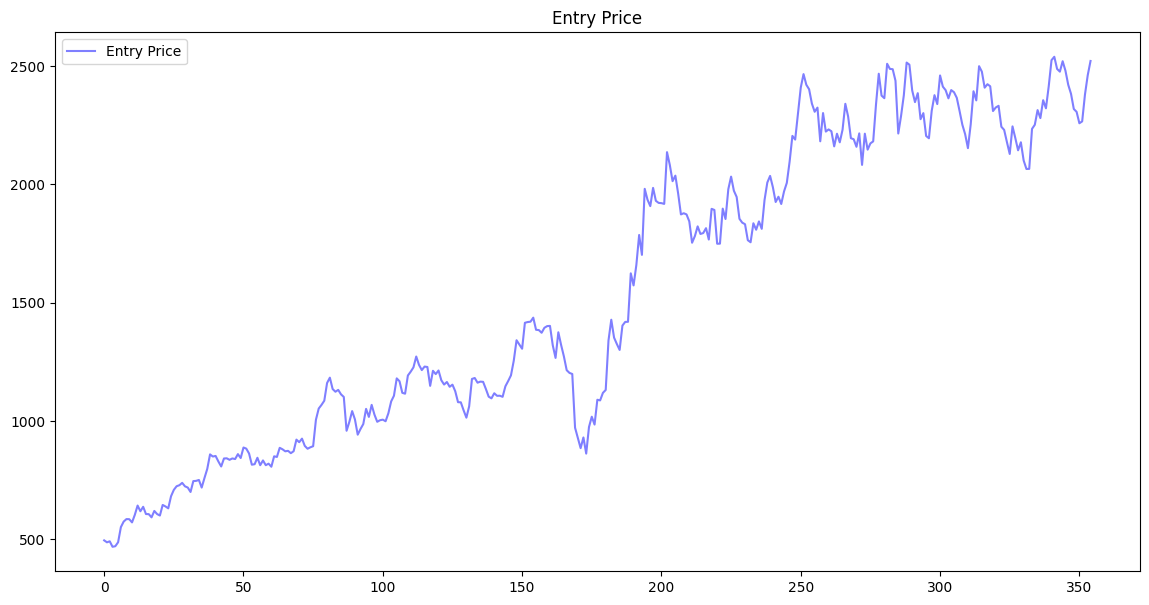

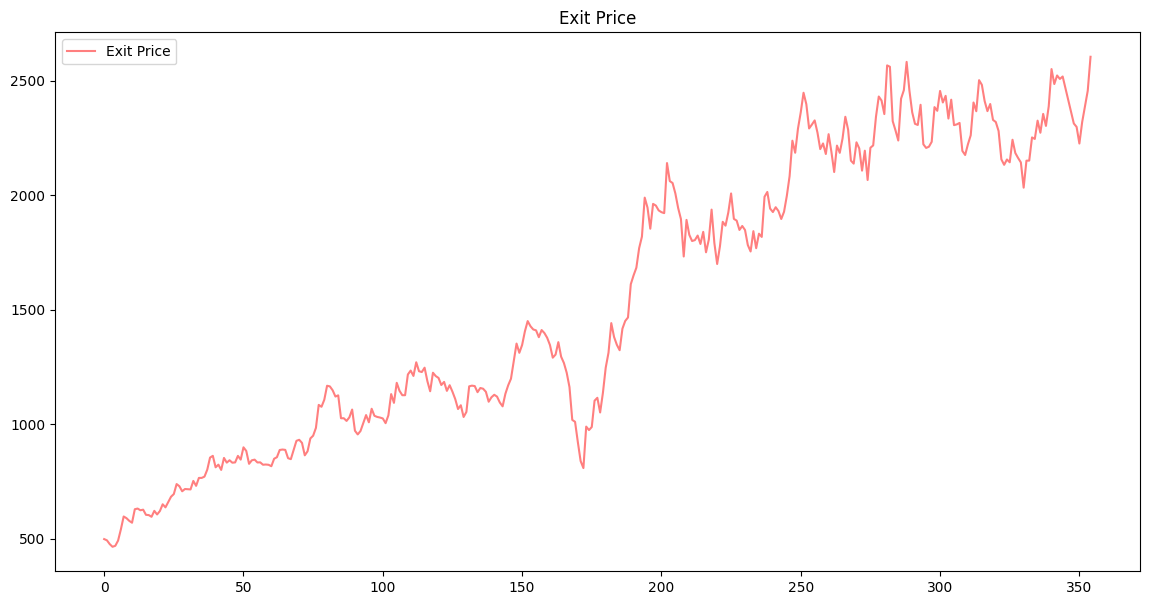

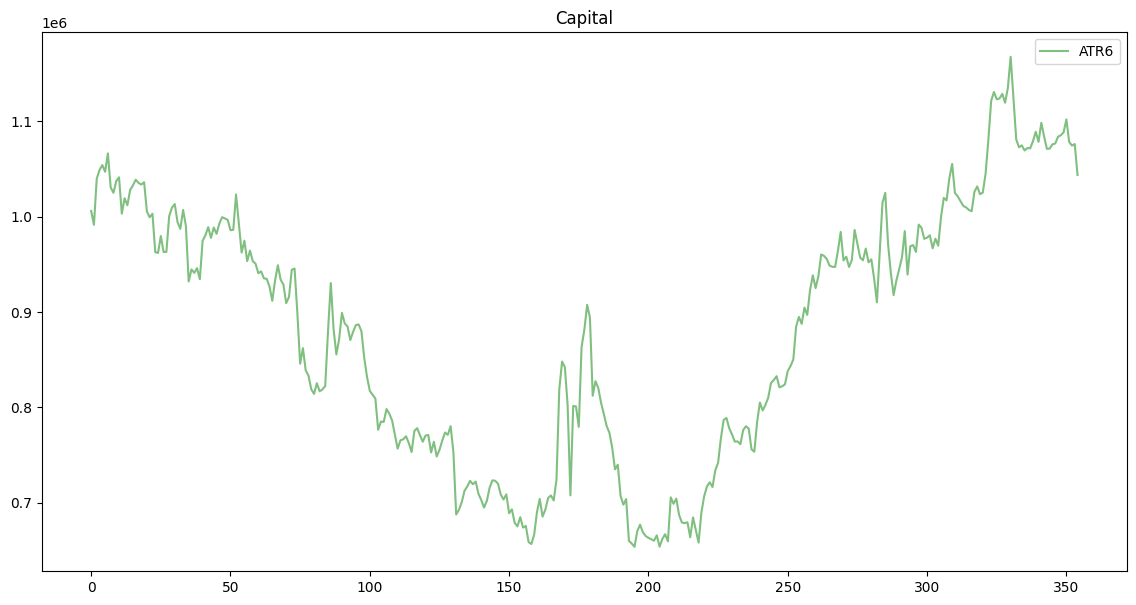

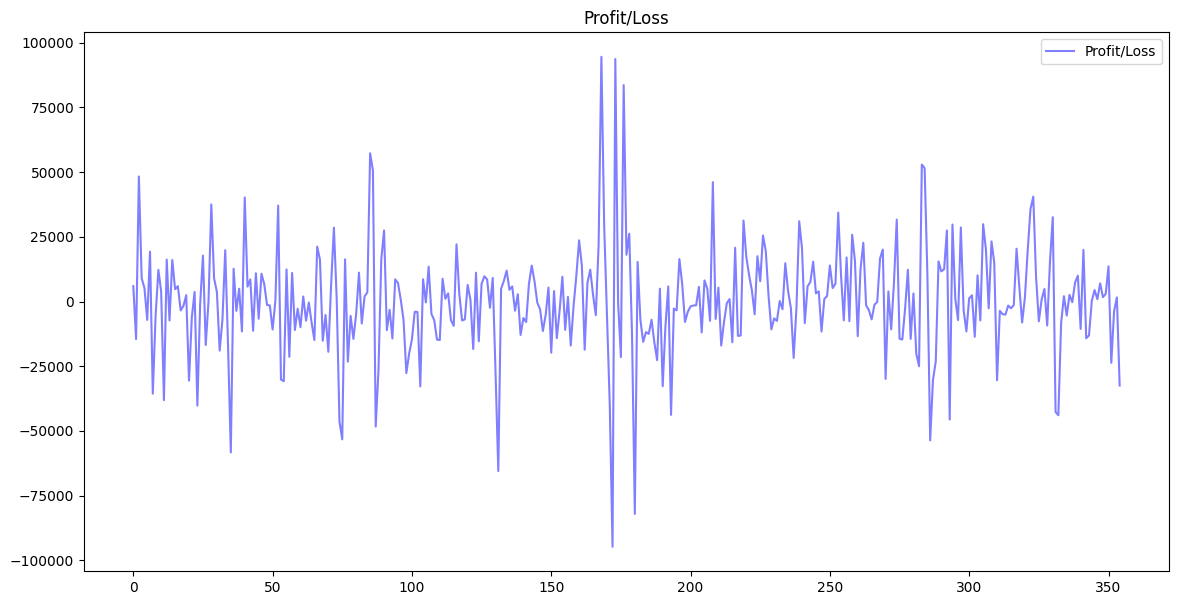

In [ ]:
data=yf.download('RELIANCE.NS',start='2017-01-01',end='2024-01-01')
data['Cluster']=0
data['signals']=0
data=calculate_indicators(data)
list1=splitter(data)
list2=[]
list3=[]
for i in range(len(list1)):

   Cluster=Clustering(list1[i])
   list2.append(Cluster.row(""))
   list2[i]=scale(list2[i])
   list3.append(mapper(list2[i]))
   list3
# i + 1 : j=1 ;i :j=0
j=1
list1[0]['Cluster']=list3[0]
data=list1[0]




list4=[]
list4.append(cluster_1(list1[0]))
for i in range(1,len(list3)):

    if(list3[i-j]==0):
      list4.append(cluster_0(list1[i]))
    if(list3[i-j]==1):
      list4.append(cluster_1(list1[i]))
    if(list3[i-j]==2):
      list4.append(cluster_2(list1[i]))
    if(list3[i-j]==3):
      list4.append(cluster_3(list1[i]))
    if(list3[i-j]==4):
      list4.append(cluster_4(list1[i]))
    if(list3[i-j]==5):
      list4.append(cluster_5(list1[i]))
    if(list3[i-j]==6):
      list4.append(cluster_6(list1[i]))
    if(list3[i-j]==7):
      list4.append(cluster_7(list1[i]))
    if(list3[i-j]==8):
      list4.append(cluster_8(list1[i]))
    if(list3[i-j]==9):
      list4.append(cluster_9(list1[i]))
    list4.append(cluster_1(list1[i]))


for i in range(1,len(list1)):
   list1[i]['Cluster']=list3[i-j]
   data=pd.concat([data,list1[i]])

dataa=data.copy()
dataa['TR'] = np.maximum(dataa['High'] - dataa['Low'],
                            np.maximum(abs(dataa['High'] - dataa['Close'].shift(1)),
                                       abs(dataa['Low'] - dataa['Close'].shift(1))))
dataa['ATR'] = dataa['TR'].rolling(window=14).mean()
dd2=data.copy()
dd2=data.copy()
dd2['No_of_Stocks']=0
dd2['Portfolio_Value']=0
dd2['Profit_From_Initial_Capital']=0
dd2['Current Position']=0
ddf=dd2.copy()


print("Single Trade")
a3,a4,buy1,sell1,tsll1,ttpl1,kk=calculate(dataa,ddf)
"""print(" ")
print(" ")
print(" ")
print(" ")
print("Multi Trade")
a1,buys2,sells2=backtest(dataa)"""


#plotted the graph of the dataframe a3 i.e Entry_price/exit_price/capital/markdown
plt.figure(figsize=(14,7))
plt.plot(a3['Entry Price'], label='Entry Price', color='blue', alpha=0.5)
#plt.title('Entry Price')
#plt.legend()
#plt.figure(figsize=(14,7))
plt.plot(a3['Exit Price'], label='Exit Price', color='red', alpha=0.5)
plt.title('Entry/Exit Price')
plt.legend()
plt.figure(figsize=(14,7))
plt.plot(a3['Capital'], label='ATR6', color='green', alpha=0.5)
plt.title('Capital')
plt.legend()
plt.figure(figsize=(14,7))
plt.plot(a3['Max Drawdown for Trade'], label='Max Drawdown for Trade', color='blue', alpha=0.5)
plt.title('Max Drawdown for Trade')
plt.legend()

plt.legend()
plt.show()


print(" ")
print(" ")
print(" ")
print(" ")
print("Multi Trade")
a1,buys2,sells2=backtest(dataa)



#plotted the graph of the dataframe a3 i.e Entry_price/exit_price/capital/profit-loss
plt.figure(figsize=(14,7))
plt.plot(a1['Entry Price'], label='Entry Price', color='blue', alpha=0.5)
plt.title('Entry Price')
plt.legend()
plt.figure(figsize=(14,7))
plt.plot(a1['Exit Price'], label='Exit Price', color='red', alpha=0.5)
plt.title('Exit Price')
plt.legend()
plt.figure(figsize=(14,7))
plt.plot(a1['Capital'], label='ATR6', color='green', alpha=0.5)
plt.title('Capital')
plt.legend()
plt.figure(figsize=(14,7))
plt.plot(a1['Profit/Loss'], label='Profit/Loss', color='blue', alpha=0.5)
plt.title('Profit/Loss')
plt.legend()

plt.legend()
plt.show()


In [ ]:
a3

,Entry Index,Exit Index,Trade Duration,Entry Price,Exit Price,Returns for Trade in %,Type of Trade,Trade Close By,No. of Stocks Traded,Profit/Loss,Capital,Max Drawdown for Trade,Max Dip for Trade
0,0,2,2,496.071228,487.865082,-1.654227,long,trailing_stop_loss,10075,-8.267692e+04,9.173231e+05,11.171882,8.267692
1,3,10,7,492.551025,492.025299,-0.106735,long,trailing_stop_loss,9310,-4.894512e+03,9.124286e+05,6.600570,1.136756
2,11,14,3,476.024475,468.961243,-1.483796,long,trailing_stop_loss,9580,-6.766577e+04,8.447628e+05,8.010032,7.416007
3,15,25,10,464.435303,471.292786,1.476521,long,trailing_stop_loss,5454,3.740071e+04,8.821635e+05,5.299581,0.000000
4,26,32,6,468.664093,488.025085,4.131102,long,ATR_TP,5646,1.093122e+05,9.914757e+05,0.837009,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1682,1684,2,2299.100098,2257.949951,-1.789837,long,trailing_stop_loss,67827,-2.791091e+06,4.919027e+07,5.674071,5.369407
346,1685,1686,1,2226.500000,2265.800049,1.765104,long,signal,66279,2.604768e+06,5.179504e+07,0.000000,0.000000
347,1690,1702,12,2320.199951,2378.899902,2.529952,long,ATR_TP,66969,3.931077e+06,5.572612e+07,3.724946,1.247695
348,1703,1712,9,2388.199951,2461.100098,3.052514,long,ATR_TP,69999,5.102937e+06,6.082905e+07,2.960468,1.350335


In [ ]:
a1

,Entry Index,Exit Index,Open/Close,Trade Duration,Entry Price,Exit Price,stop loss,take profit,ATR_stop_loss,Returns for Trade in %,Type of Trade,Trade Close By,No. of Stocks Traded,Profit/Loss,Capital
0,0,1,0,1,496.071228,498.037018,471.267667,520.874789,NaN,0.396272,long,Intraday_price_change_limit,3020,5936.685181,1.005937e+06
1,2,3,0,1,487.865082,492.551025,512.258336,463.471828,NaN,-0.960500,short,signal,3090,-14479.565735,9.914571e+05
2,10,11,0,1,492.025299,476.024475,516.626564,467.424034,NaN,3.252033,short,signal,3020,48322.488403,1.039780e+06
3,14,15,0,1,468.961243,464.435303,492.409305,445.513181,484.932683,0.965099,short,signal,1995,9029.250183,1.048809e+06
4,25,26,0,1,471.292786,468.664093,494.857425,447.728146,485.340851,0.557762,short,signal,2001,5260.013947,1.054069e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1684,1685,0,1,2257.949951,2226.500000,2370.847449,2145.052454,2314.735665,1.392854,short,signal,432,13586.378906,1.101909e+06
351,1686,1690,0,4,2265.800049,2320.199951,2379.090051,2152.510046,2337.242920,-2.400914,short,signal,435,-23663.957520,1.078245e+06
352,1702,1703,0,1,2378.899902,2388.199951,2497.844897,2259.954907,2428.435617,-0.390939,short,signal,405,-3766.519775,1.074479e+06
353,1712,1713,0,1,2461.100098,2457.050049,2584.155103,2338.045093,2511.471540,0.164563,short,signal,390,1579.519043,1.076058e+06


# Live Trading


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math
data = yf.download('zomato.NS', start='2024-08-01', end='2024-09-01',interval='5m')
# data=data.drop(columns=['Adj Close','Volume'])
data=data.tail(63)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-08-30 10:15:00+05:30,251.149994,251.289993,250.529999,250.860001
2024-08-30 10:20:00+05:30,250.860001,251.929993,250.770004,251.460007
2024-08-30 10:25:00+05:30,251.460007,252.919998,251.399994,252.850006
2024-08-30 10:30:00+05:30,252.850006,253.710007,252.529999,253.679993
2024-08-30 10:35:00+05:30,253.619995,254.000000,252.539993,252.710007
...,...,...,...,...
2024-08-30 15:05:00+05:30,250.690002,251.410004,250.240005,250.740005
2024-08-30 15:10:00+05:30,250.740005,250.789993,249.740005,250.360001
2024-08-30 15:15:00+05:30,250.389999,250.660004,249.919998,250.050003


In [ ]:
ticker = "zomato"
exchange = "NSE"

def get_price(ticker=ticker, exchange=exchange):
    url = f'https://www.google.com/finance/quote/{ticker}:{exchange}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    class1 = "YMlKec fxKbKc"
    price = float(soup.find(class_=class1).text.strip()[1:].replace(",",""))
    return price

In [ ]:
strategy_to_be_used=3

In [ ]:
# use counter to check how
var = 1
lst=[]
total_time_in_min=1
num_div=20
trade=0
counter=5
while True:
  if var%num_div!=0:
    if var%num_div==1:
        open=get_price()
    lst.append(get_price())
    var+=1
    time.sleep(total_time_in_min*60/num_div)
  elif var%num_div==0:
    close=get_price()
    high=max(lst)
    low=min(lst)
    Datetime = (datetime.utcnow() + timedelta(hours=5, minutes=30)).strftime('%Y-%m-%d %H:%M:%S')
    new_row = pd.DataFrame({'Close': [close],'Open':[open],'High':[high],'Low':[low]},index=[pd.to_datetime(Datetime)])
    data = pd.concat([data, new_row])
    #backtest_(data)
    # a1,buys2,sells2=backtest(data)
    # print(a1)
    # data=data.drop(data.index[buys2])
    # data=data.drop(data.index[sells2])
    lst=[]
    var+=1
    time.sleep(total_time_in_min*60/num_div)
    data=calculate_indicators(data)
    data=data.tail(63)
    #strategy_to_be_used=Clustering(data)
    data['signals']=0;
    if(strategy_to_be_used==0):
      data=cluster_0(data)
    if(strategy_to_be_used==1):
      data=cluster_1(data)
    if(strategy_to_be_used==2):
      data=cluster_2(data)
    if(strategy_to_be_used==3):
      data=cluster_3(data)
    if(strategy_to_be_used==4):
      data=cluster_4(data)
    if(strategy_to_be_used==5):
      data=cluster_5(data)
    if(strategy_to_be_used==6):
      data=cluster_6(data)
    if(strategy_to_be_used==7):
      data=cluster_7(data)
    if(strategy_to_be_used==8):
      data=cluster_8(data)
    if(strategy_to_be_used==9):
      data=cluster_9(data)


    if(counter):
      if(trade==0):
        if(data['signals'].iloc[-1]==1):
          trade=1
          print("entered long position at time "+str(data.index[-1])+" at price"+str(data['Close'].iloc[-1]))
        elif(data['signals'].iloc[-1]==-1):
          trade=-1
          print("entered short position at time "+str(data.index[-1])+" at price"+str(data['Close'].iloc[-1]))

      if(trade==1):
        if(data['signals'].iloc[-1]==-1):
          trade=0
          print("exited long position at time "+str(data.index[-1])+" at price"+str(data['Close'].iloc[-1]))
          counter=counter-1
      if(trade==-1):
        if(data['signals'].iloc[-1]==1):
          trade=0
          print("exited short position at time "+str(data.index[-1])+" at price"+str(data['Close'].iloc[-1]))
          counter=counter-1

    print(data)

In [ ]:
def graph_(data,ticker):
  # Convert the index to a consistent timezone (e.g., UTC)
  # Ensure all datetimes are tz-naive before localizing
  data.index = pd.to_datetime(data.index, utc=True).tz_localize(None)
  data.index = data.index.tz_localize('UTC') # Localize the index to UTC

  # Plotting the close_price, chart
  plt.figure(figsize=(14,7))
  plt.plot(data['Close'], label='Close', color='blue', alpha=0.5)
  plt.scatter(data[data['signals'] == 1].index, data[data['signals'] == 1]['Close'], label='Buy Signal', marker='^', color='green')
  plt.scatter(data[data['signals'] == -1].index, data[data['signals'] == -1]['Close'], label='Sell Signal', marker='v', color='red')
  plt.scatter(data[data['signals'] == 0].index, data[data['signals'] == 0]['Close'], label='Hold Signal', marker='o', color='orange')
  plt.title('close price with buy and sell signal')
  plt.legend()
  plt.figure(figsize=(14,7))
  plt.plot(data['TR6'], label='TR6', color='red', alpha=0.5)
  plt.title('TR6')
  plt.legend()
  plt.figure(figsize=(14,7))
  plt.plot(data['ATR6'], label='ATR6', color='green', alpha=0.5)
  plt.title('ATR6')
  plt.legend()
  plt.figure(figsize=(14,7))
  plt.plot(data['stop_loss1_6'], label='stop_loss1_6', color='blue', alpha=0.5)
  plt.title('stop_loss1_6')
  plt.legend()
  plt.figure(figsize=(14,7))
  plt.plot(data['stop_loss2_6'], label='stop_loss2_6', color='orange', alpha=0.5)

  plt.title('stop_loss2_6')
  plt.legend()
  plt.show()


In [ ]:
graph_(data,ticker)